# 1. Importing packages

In [6]:
from qiskit import *
from qiskit.tools.visualization import plot_bloch_multivector,plot_histogram
import numpy as np

# 2. Making circuit

The link to get background on the mathematics <a href="https://qiskit.org/textbook/ch-algorithms/quantum-fourier-transform.html">QFT</a>

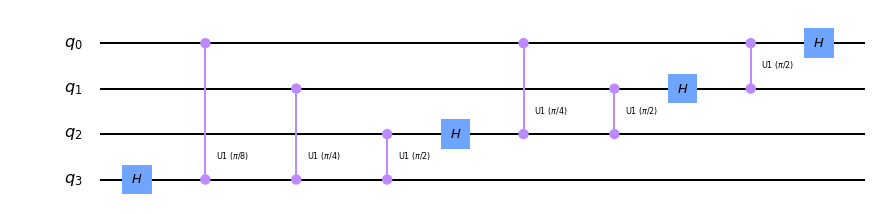

In [23]:
def qft(qc,n):
    if n==0:
        return qc
    n-=1
    qc.h(n)
    for q in range(n):
        qc.cu1(np.pi/(2**(n-q)),q,n)
    #qc.barrier()
    return qft(qc,n)

n=4
qc=QuantumCircuit(n)
qc=qft(qc,n)
qc.draw('mpl')

Keep in mind that in qiskit the qubit representation is reversed, so the string we would obtain from the above would also be reversed, for that matter the qiskit texbook has used the SWAP gates but that means the depth of the circuit would increase.

# 3. Making the job

## 3.1 Input state prep

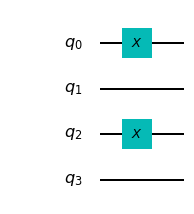

In [13]:
def istate(s):
    n=len(s)
    qc=QuantumCircuit(n)
    for idx,ch in enumerate(s):
        if ch=='1':
            qc.x(idx)
    return qc

istate('1010').draw('mpl')

## 3.2 Appending the input to our QFT circuit and executing job

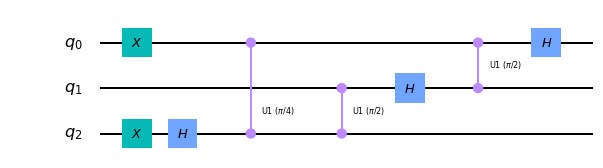

In [39]:
inp='101'
n=len(inp)
qc=istate(inp)
#qc.barrier()
qc=qft(qc,n)
qc.draw('mpl')

Uncomment the barriers to understand the code better

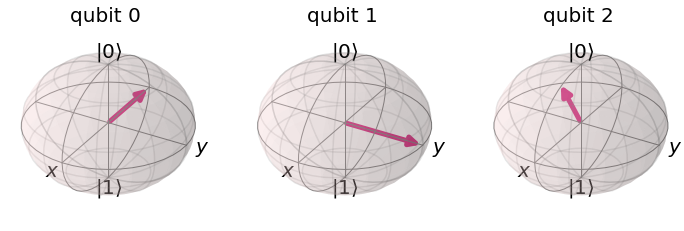

In [40]:
backend=Aer.get_backend('statevector_simulator')
result=execute(qc,backend=backend).result()
plot_bloch_multivector(result.get_statevector())

We have obtained the reversed state meaning change the states of q0,q1,q2 -> q2,q1,q0